<a href="https://colab.research.google.com/github/neurosxx/DS-Live-022122/blob/main/Copy_of_Official_project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction and Business Understanding**




In this project, we will be looking at an aircraft dataset to provide  recommendations of which aircraft are the lowest risk for interested stakeholder.

Commerical and private enterprises is a signifcant, global market.  According to Statista, global airline industry was 762.8 billion in 2023. While that is a a staggering number, there is also a signifcant overhead in obtaining private and commercial usage of aircrafts. Stakeholders of corporations require research on factors of aircraft safety to prioritize protection of products, employees, and efficiency.  As Pfizer is interested in delivering medical cargo, the following project will focus on recommendations on safest aircrafts.


# **Data**

In order to obtain more information relevant to aircrafts, a dataset from https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses will be utilized.  

  * The National Transportation Safety Board [NTSB] provides information from 1962 and more recent dates about civil aviation accident and chosen incidents within the United States, territories and possessions, and in international waters.

  With use of the above dataset, we are able to determine factors of safety and their value to investors.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git config --global user.email "jherrera1992x@gmail.com"
!git config --global user.name "neurosxx"

In [5]:
!git clone https://github.com/neurosxx/dsc-phase-1-project-v3.git

Cloning into 'dsc-phase-1-project-v3'...
fatal: could not read Username for 'https://github.com': No such device or address


# Limitations
This data does not provide a completed dataset for more accurate analysis.  Obtaining a larger data set would lead to improved analysis of safety features for recommended aircrafts.  Therefore, a more quality analysis of safest aircraft recommendations is not able to be obtained.  

"Notebook clearly describes the data, including:
- Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project"
Limitations on the data consist of the integrated data set having limited data.  Obtaining a larger data set would lead to improved analysis of safety features for recommended aircrafts.

# **Method**

# Data Preparation

Before anything else, we are going to import packages required to analyze the data.  Next, we will incorporate our datasets and become familiarized with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', None)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/master/data/Aviation_Data.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)

<ipython-input-2-3e8a288c3897>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/master/data/Aviation_Data.csv', encoding='latin-1')


In [3]:
# df['Amateur.Built'].value_counts()

In [4]:
df['Amateur.Built']
# Don't purge column of amateur.build.
# All crashes are tied to the Event.Id column .

df.drop(df[df['Amateur.Built'] == 'Yes'].index, inplace=True)
   # This column will be dropped due to company's desire to purchase safe airplanes. This column contains non-professionally built planes.

In [5]:
# df.info()
# High cardinality = column that has a lot of individual, unique values.
# pareto distribution - LOok up. Comes from italian mathemitican, talks about if 100 workers, 10% will be doing most of the work.

# Use the qualitative and quantitative information to pinpoint. Example longitude/latitude & Country.

In [6]:
df['Model'].str.lower().value_counts()
# Unreg = unregistered, Unk none = no registration, usaf = U.S. Airforce
# dropping this column.
# One of the problems is 172 & 172n or 150m and 150 are same models.
# This had high cardinality, but distrubtion was non uniform.
# High cardinality = crazy scatter plot

# df['Model'].isnull().sum()

,count
Model,
152,2363
172,1751
172n,1160
pa-28-140,925
150,828
172m,797
172p,689
182,657
180,622


In [7]:
# df['Aircraft.Category']

In [8]:
# df['Event.Id'].value_counts()

In [9]:
df['Broad.phase.of.flight'].str.lower().value_counts()
# Might drop "unknown" and "other" rows due to not being able to do anything with these.
# Has low cardinality. Non uniformally distributed.
# OTHER & UNKNKOWN ROWS HAVE BEEN DROPPED!


,count
Broad.phase.of.flight,
landing,14507
takeoff,11038
cruise,9378
maneuvering,7150
approach,5852
taxi,1877
climb,1831
descent,1764
go-around,1273


In [10]:
df.drop(df[df['Broad.phase.of.flight'] == 'Other'].index, inplace=True)
df.drop(df[df['Broad.phase.of.flight'] == 'Unknown'].index, inplace=True)
# The "Other" and "Unknown" rows within the "Broad.phase.of.flight" column are dropped here due to not being able to do anything with these rows.

In [11]:
# df['Broad.phase.of.flight'].value_counts

In [12]:
# df.describe()
# High cardinality = less useful, gives us less apparent groups.
# If cessna is in a lot of accidents, it's becuase they're used more. They represent 1/3 of the dataset.
# If it's low
#cardinlity, the distribution doesn't matter much. Able to use.
# do

In [13]:
df.dropna(subset=['Model'], inplace=True)

In [14]:
# df['Model'].isna().sum()

In [15]:
df.dropna(subset=['Model'], inplace=True)

In [16]:
def lower_model(df):
  df['Model'] = df['Model'].str.lower()
  return df

In [17]:
# df = lower_model(df)

In [18]:
# df['Model'].value_counts()

In [19]:
# df['Model'].unique()

In [20]:
(df['Make'].str.lower().value_counts()[:50]/len(df)).sum()
# pareto distribution. due to A few unique values provides the data.
df['Make'].unique()

array(['Stinson', 'Cessna', 'Rockwell', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [21]:
def Cat_distribution(col, cat):
  """

  """
  return (df[col].str.lower().value_counts()[:cat]/len(df)).sum()
# Cat = categorical, cat represents index
# what percentage of rows are represented in this # of categories.

In [22]:
Cat_distribution('Make', 10) # Pareto distribution.

0.7259473756784878

In [23]:
Cat_distribution('Event.Id', 1000) # This one has high cardinality, Not pareto distribution.

0.02290248580346734

In [24]:
Cat_distribution('Investigation.Type', 10) # Low cardinality, pareto distribution

1.0

In [25]:
Cat_distribution('Accident.Number', 10)

0.00025071139357928123

In [26]:
# df['Model'].unique()

In [27]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, len(df[col].str.lower().value_counts()))

  # This provides cardinality, seperate below by high & low cardinality. Then put in the
  # LOw cardianlity & useful / related to business problem, keep.
  # If distribution matters = High Cardinality,
  # *** IS THE COLUMN useful? = If Not kick it out.

Event.Id 78946
Investigation.Type 2
Accident.Number 79749
Event.Date 14688
Location 20773
Country 213
Latitude 22945
Longitude 24214
Airport.Code 9787
Airport.Name 20052
Injury.Severity 108
Aircraft.damage 4
Aircraft.Category 14
Registration.Number 71364
Make 1912
Model 8483
Amateur.Built 1
Engine.Type 12
FAR.Description 31
Schedule 3
Purpose.of.flight 26
Air.carrier 12264
Weather.Condition 3
Broad.phase.of.flight 10
Report.Status 14751
Publication.Date 2855


In [28]:
# df['Air.carrier'].unique()

In [29]:
# df['Air.carrier'].info()

In [30]:
cat = 20
for col in df.columns:  # Understanding the distribution of values
    if df[col].dtype == 'object':
      result = (df[col].str.lower().value_counts()[:cat]/len(df)).sum()
      print(col, result)

# Calculated only objects here. # Remember the cat = 20 provides the index to include, so example the top 20 cover most of the distribution ** double check wit


Event.Id 0.0005264939265164904
Investigation.Type 1.0
Accident.Number 0.0005014227871585625
Event.Date 0.005365223822596616
Location 0.05021749213393003
Country 0.9661790330061549
Latitude 0.0033093903952465123
Longitude 0.0033595326739623687
Airport.Code 0.04253318792072505
Airport.Name 0.02391786694746343
Injury.Severity 0.9860479109473128
Aircraft.damage 0.9607009890564476
Aircraft.Category 0.35914407130232034
Registration.Number 0.00299600115327241
Make 0.7943539794165946
Model 0.1939503340729319
Amateur.Built 0.9987464430321036
Engine.Type 0.9160618254296566
FAR.Description 0.35503240444762013
Schedule 0.15328494603437254
Purpose.of.flight 0.922580321662718
Air.carrier 0.010567485239366703
Weather.Condition 0.9454828074661853
Broad.phase.of.flight 0.6967896406052173
Report.Status 0.7297707244305718
Publication.Date 0.2679854085968936


In [31]:
for col in df.columns:
   if df[col].dtype == "float64":
      result = (df[col].value_counts()/len(df)).sum()
      print(col, result)
# float64 is goal to obtain from this 'for loop'.

Number.of.Engines 0.9282087924485729
Total.Fatal.Injuries 0.8724255073771826
Total.Serious.Injuries 0.8609930678299674
Total.Minor.Injuries 0.8676118486204606
Total.Uninjured 0.9386007797124342


In [32]:
# df['Make'].value_counts()
# This is an example of High Cardinality

In [33]:
# df['Event.Id'].info()
# not worth to drop.

In [34]:
# df['Event.Id'].value_counts()
# High cardinality bruhh

In [35]:
# df['Report.Status'].value_counts()
# Also has high amount of unique values, able to be possibly dropped. Check for null values.

In [36]:
# df['FAR.Description'].isna().sum()

In [37]:
# df['FAR.Description'].info()

In [38]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, len(df[col].str.lower().value_counts()))

  # This provides cardinality, seperate below by high & low cardinality. Then put in the
  # LOw cardianlity & useful / related to business problem, keep.
  # If distribution matters = High Cardinality,
  # *** IS THE COLUMN useful? = If Not kick it out

  # $$$********* COPY OF ABOVE CODE**** $$$
  # This provides cardinality, remember ** Low cardinality = few unique values, able to use.

Event.Id 78946
Investigation.Type 2
Accident.Number 79749
Event.Date 14688
Location 20773
Country 213
Latitude 22945
Longitude 24214
Airport.Code 9787
Airport.Name 20052
Injury.Severity 108
Aircraft.damage 4
Aircraft.Category 14
Registration.Number 71364
Make 1912
Model 8483
Amateur.Built 1
Engine.Type 12
FAR.Description 31
Schedule 3
Purpose.of.flight 26
Air.carrier 12264
Weather.Condition 3
Broad.phase.of.flight 10
Report.Status 14751
Publication.Date 2855


In [39]:
df.drop(columns =['FAR.Description'], inplace=True) # dropped here, doesn't seem relevant to business problem.

In [40]:
df.drop(columns =['Location'], inplace=True)

In [41]:
df.drop(columns =['Country'], inplace=True)

In [42]:
df.drop(columns =['Latitude'], inplace=True)

In [43]:
df.drop(columns =['Longitude'], inplace=True)

In [44]:
df.drop(columns =['Airport.Code'], inplace=True)

In [45]:
df.drop(columns =['Airport.Name'], inplace=True)

In [46]:
df.drop(columns =['Schedule'], inplace=True)

In [47]:
df.drop(columns =['Purpose.of.flight'], inplace=True)

In [48]:
df.drop(columns =['Air.carrier'], inplace=True)
# Dropped column due to significant amount of null values.

In [116]:
df.drop(columns =['Injury.Severity'], inplace=True)

In [49]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(col, df[col].isna().sum())
  # This for loop provides amount of null values in current columns.

Event.Id 0
Investigation.Type 0
Accident.Number 0
Event.Date 0
Injury.Severity 979
Aircraft.damage 3135
Aircraft.Category 51123
Registration.Number 1258
Make 6
Model 0
Amateur.Built 100
Engine.Type 6696
Weather.Condition 4349
Broad.phase.of.flight 24188
Report.Status 5993
Publication.Date 13940


In [50]:
df.dropna(subset=['Aircraft.damage'], inplace=True)

In [51]:
df.drop(df[df['Aircraft.damage'] == 'Unknown'].index, inplace=True)

In [52]:
df.drop(df[df['Aircraft.Category'] == 'Unknown'].index, inplace=True)

In [53]:
df['Aircraft.Category'].fillna('Airplane', inplace=True)

In [54]:
df.dropna(subset=['Registration.Number'], inplace=True)

In [55]:
df.dropna(subset=['Make'], inplace=True)

In [56]:
df.dropna(subset=['Amateur.Built'], inplace=True)

In [57]:
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'UNK', 'NONE'], dtype=object)

In [58]:
df.drop(df[df['Engine.Type'] == 'Unknown'].index, inplace=True)

In [59]:
df.drop(df[df['Engine.Type'] == 'NONE'].index, inplace=True)

In [60]:
df.dropna(subset=['Engine.Type'], inplace=True)

In [61]:
# df['Weather.Condition'].value_counts()

In [62]:
df.drop(df[df['Weather.Condition'] == 'UNK'].index, inplace=True)

In [63]:
df.drop(df[df['Weather.Condition'] == 'Unk'].index, inplace=True)

In [64]:
df.dropna(subset=['Weather.Condition'], inplace=True)

In [65]:
# df['Broad.phase.of.flight'].value_counts()

In [66]:
df['Broad.phase.of.flight'].isna().sum()/len(df['Broad.phase.of.flight'])

0.23067212705682036

In [67]:
df.dropna(subset=['Broad.phase.of.flight'], inplace=True)

In [68]:
df['Publication.Date'].isna().sum()/len(df['Publication.Date'])

0.2053918949858811

In [69]:
# df.head(20)

In [70]:
df.dropna(subset=['Publication.Date'], inplace=True)

In [71]:
for col in df.columns:
  if df[col].dtype == 'object':
    missing_count = (df[col].isna().sum())
    print(f'Column "{col}" has {missing_count} missing values.')

  # This for loop provides amount of null values in current columns.

Column "Event.Id" has 0 missing values.
Column "Investigation.Type" has 0 missing values.
Column "Accident.Number" has 0 missing values.
Column "Event.Date" has 0 missing values.
Column "Injury.Severity" has 0 missing values.
Column "Aircraft.damage" has 0 missing values.
Column "Aircraft.Category" has 0 missing values.
Column "Registration.Number" has 0 missing values.
Column "Make" has 0 missing values.
Column "Model" has 0 missing values.
Column "Amateur.Built" has 0 missing values.
Column "Engine.Type" has 0 missing values.
Column "Weather.Condition" has 0 missing values.
Column "Broad.phase.of.flight" has 0 missing values.
Column "Report.Status" has 0 missing values.
Column "Publication.Date" has 0 missing values.


In [72]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col].info()
    print(col)

<class 'pandas.core.series.Series'>
Index: 41647 entries, 2 to 63911
Series name: Event.Id
Non-Null Count  Dtype 
--------------  ----- 
41647 non-null  object
dtypes: object(1)
memory usage: 650.7+ KB
Event.Id
<class 'pandas.core.series.Series'>
Index: 41647 entries, 2 to 63911
Series name: Investigation.Type
Non-Null Count  Dtype 
--------------  ----- 
41647 non-null  object
dtypes: object(1)
memory usage: 650.7+ KB
Investigation.Type
<class 'pandas.core.series.Series'>
Index: 41647 entries, 2 to 63911
Series name: Accident.Number
Non-Null Count  Dtype 
--------------  ----- 
41647 non-null  object
dtypes: object(1)
memory usage: 650.7+ KB
Accident.Number
<class 'pandas.core.series.Series'>
Index: 41647 entries, 2 to 63911
Series name: Event.Date
Non-Null Count  Dtype 
--------------  ----- 
41647 non-null  object
dtypes: object(1)
memory usage: 650.7+ KB
Event.Date
<class 'pandas.core.series.Series'>
Index: 41647 entries, 2 to 63911
Series name: Injury.Severity
Non-Null Count  Dtyp

In [73]:
column = df
threshold = 0.95

In [74]:
def threshold_func():
  if threshold >= 0.95:
    return column
  # Build it step by step.
  #With this function I want to sort columns by low cardinality and


In [75]:
# threshold_func()

In [76]:
# df.head(20)
# DROP injury severity column.

In [77]:
# df['Aircraft.damage'].isna().sum()

In [78]:
# df['Aircraft.damage'].info()

In [79]:
df.dropna(subset=['Injury.Severity'], inplace=True)

In [80]:
# df['Aircraft.damage'].info()

In [81]:
# df['Make'].value_counts()

In [82]:
df['Aircraft.Category'] = df['Aircraft.Category'].apply(lambda x: x if x == "Airplane" else ("Helicopter" if x == "Helicopter" else None))

In [83]:
df['Aircraft.Category'].value_counts()

,count
Aircraft.Category,
Airplane,40976
Helicopter,653


In [84]:
# sorted_non_fatal = df['Injury.Severity'].apply(lambda x: x if x == "Non-Fatal" else None)

In [85]:
def process_injury_severity(df):
  non_fatal = df.loc[df['Injury.Severity'] == 'Non-Fatal', 'Make'].tolist()
  return non_fatal
  # TOO SPECIFIC OF A starting place, look at # of engines. Then do a count of
  # plot engine count and count of fatalities and serious injuries, all separate.

In [86]:
non_fatal_result = process_injury_severity(df)

In [87]:
non_fatal_series = pd.Series(non_fatal_result)

In [88]:
# non_fatal_series.value_counts()

In [89]:
# non_fatal_series.info()

In [90]:
# df['Number.of.Engines'].describe()

In [91]:
group_by_engine_fatal = df.groupby(by='Number.of.Engines')['Total.Fatal.Injuries'].sum()

# **Visualizations: Total Number of Engines By Total Fatal Injuries**

<Axes: title={'center': 'Total-Fatal-Injuries By Number-of-Engines'}, xlabel='Number.of.Engines', ylabel='Total Fatal Injuries'>

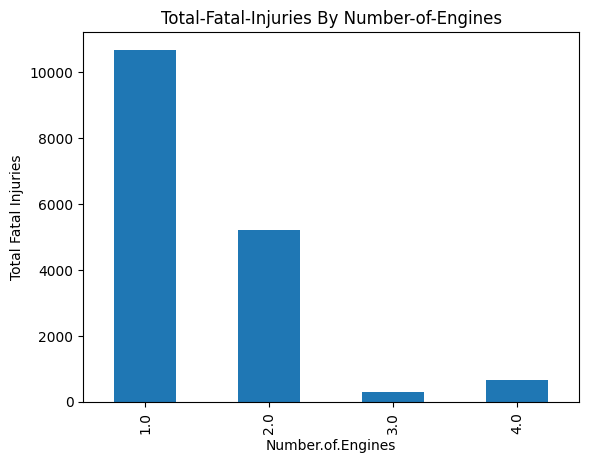

In [92]:
group_by_engine_fatal.plot(kind='bar', ylabel='Total Fatal Injuries', title='Total-Fatal-Injuries By Number-of-Engines')

In [93]:
group_by_make_fatal = df.groupby(by='Make')['Total.Fatal.Injuries'].sum()

In [94]:
df['Make'].value_counts().sort_index()

,count
Make,
Aaa Aircraft Leasing,1
Ac Mfg & Dev't Co,1
Adams,1
Advanced Acft,1
Advanced Aviation,1
Advanced Technology,1
Adventura,1
Aerial Productions Intl. Inc.,1
Aermacchi,1


<Axes: title={'center': 'Fatal-Injuries & Make_Groupby'}, xlabel='Make', ylabel='Total Fatal Injuries'>

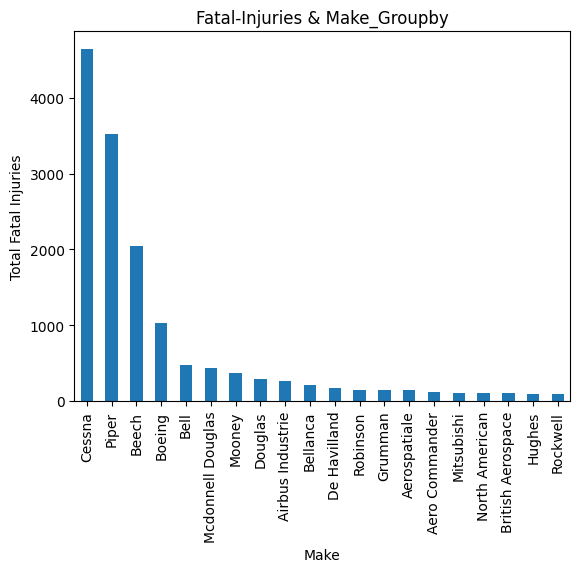

In [95]:
group_by_make_fatal.sort_values(ascending=False).head(20).plot(kind='bar', ylabel='Total Fatal Injuries', xlabel='Make', title='Fatal-Injuries & Make_Groupby')

In [96]:
group_by_make_fatal

,Total.Fatal.Injuries
Make,
Aaa Aircraft Leasing,2.0
Ac Mfg & Dev't Co,0.0
Adams,1.0
Advanced Acft,0.0
Advanced Aviation,0.0
Advanced Technology,0.0
Adventura,0.0
Aerial Productions Intl. Inc.,1.0
Aermacchi,0.0


In [97]:
df['Number.of.Engines'] = df['Number.of.Engines'].astype(float)

<Axes: title={'center': ' Number-of-Engines-Value_Counts'}, xlabel='Number of Engines', ylabel='Total Fatal Injuries'>

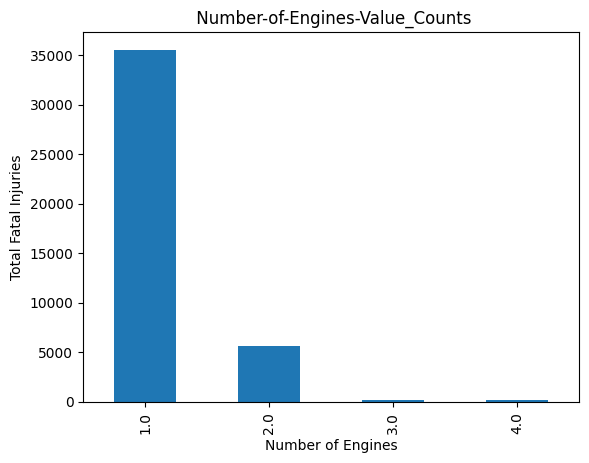

In [98]:
df['Number.of.Engines'].value_counts().plot(kind='bar', ylabel='Total Fatal Injuries', xlabel='Number of Engines', title=' Number-of-Engines-Value_Counts')


In [99]:
# df['Number.of.Engines'] = df['Number.of.Engines'].apply(lambda x: x if x in [1.0, 2.0] else None)

# THIS IS to filter by # Of Enginges to be only 1 or 2.

In [100]:
df.dropna(subset=['Number.of.Engines'], inplace=True)

In [101]:
df.dropna(subset=['Aircraft.Category'], inplace=True)

In [102]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,Non-Fatal,Substantial,Airplane,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,Non-Fatal,Substantial,Airplane,N44832,Piper,PA-28-161,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,Non-Fatal,Substantial,Airplane,N4275S,Beech,V35B,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,Non-Fatal,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,Fatal(1),Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [103]:
Engines_counts = df['Number.of.Engines'].value_counts()

In [104]:
Engines_counts

,count
Number.of.Engines,
1.0,35544
2.0,5632
3.0,214
4.0,179


In [105]:
Fatal_counts = df['Total.Fatal.Injuries'].value_counts()

In [106]:
Serious_counts = df['Total.Serious.Injuries'].value_counts()

<ipython-input-107-3459b642e708>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,
<ipython-input-107-3459b642e708>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


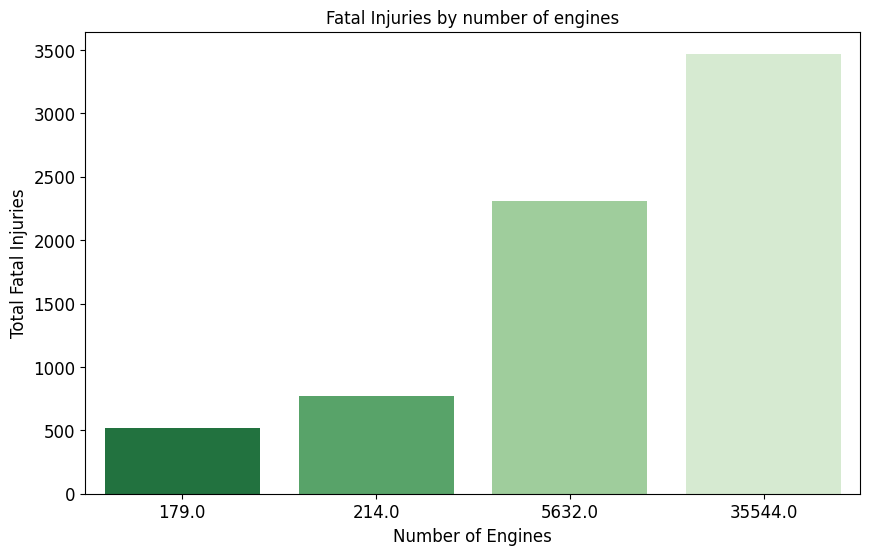

In [107]:
# Specify size of plot
fig,ax = plt.subplots(figsize=(10, 6))

# Create bar plot
sns.barplot(data=df,
            x= Engines_counts,
            y= Fatal_counts,
            ci=None,
            palette='Greens_r')

# Label and define fontsize for main and axes titles
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.title ('Fatal Injuries by number of engines')
plt.tick_params(axis='both', which='major', labelsize=12)
# Show plot
plt.show()


<ipython-input-108-d235057d2acb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,
<ipython-input-108-d235057d2acb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


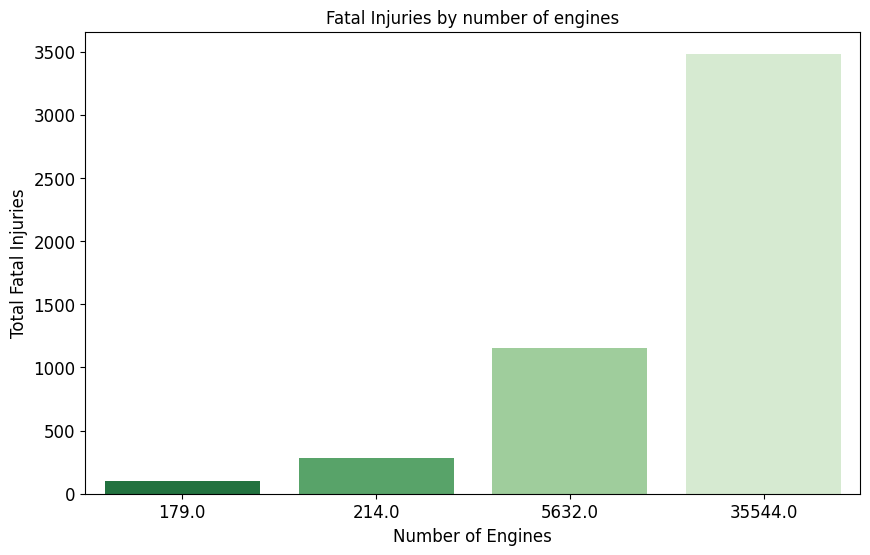

In [108]:
# Specify size of plot
fig,ax = plt.subplots(figsize=(10, 6))

# Create bar plot
sns.barplot(data=df,
            x= Engines_counts,
            y= Serious_counts,
            ci=None,
            palette='Greens_r')

# Label and define fontsize for main and axes titles
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.title ('Fatal Injuries by number of engines')
plt.tick_params(axis='both', which='major', labelsize=12)
# Show plot
plt.show()


<Axes: xlabel='Number.of.Engines'>

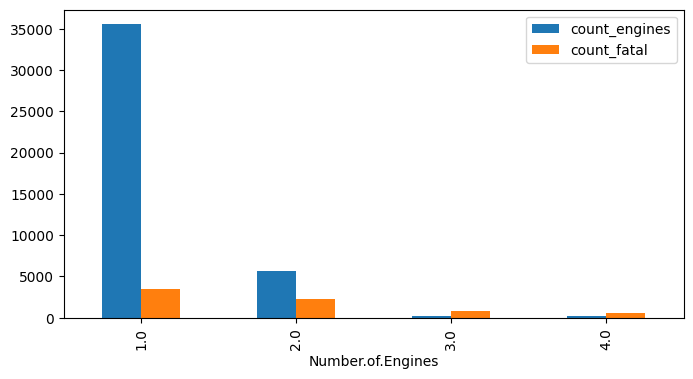

In [109]:
graph_df = df['Number.of.Engines'].value_counts().to_frame()\
               .join(df['Total.Fatal.Injuries'].value_counts().to_frame(),
                     lsuffix='_engines', rsuffix='_fatal')
# Add suffixes to distinguish between 'count' columns from the two DataFrames

graph_df.plot(kind='bar',figsize=(8, 4))

In [110]:
df['Number.of.Engines'].value_counts()

,count
Number.of.Engines,
1.0,35544
2.0,5632
3.0,214
4.0,179


In [111]:
def function(df):
  df['Number.of.Engines'] = df['Number.of.Engines'].apply(lambda x: x if x in [1.0, 2.0] else None)

<Axes: title={'center': 'Total-Fatal-Injuries By Engine-Type'}, xlabel='Engine.Type', ylabel='Total Fatal Injuries'>

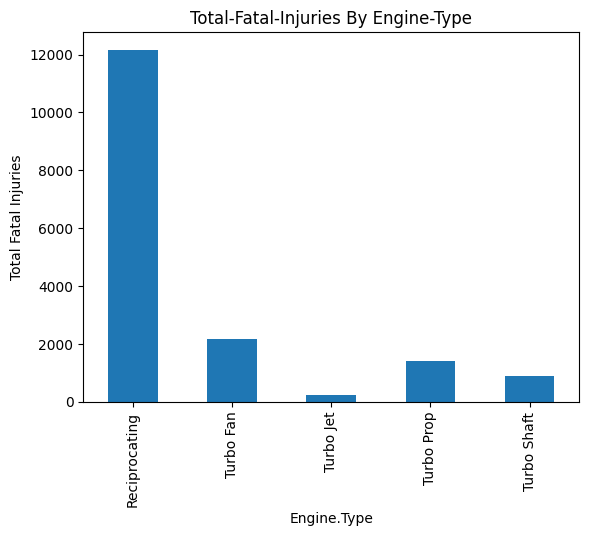

In [112]:
df.groupby(by='Engine.Type')['Total.Fatal.Injuries'].sum().plot(kind='bar', ylabel='Total Fatal Injuries', title='Total-Fatal-Injuries By Engine-Type')

In [121]:
df.head(10)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,Substantial,Airplane,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,Substantial,Airplane,N44832,Piper,PA-28-161,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,Substantial,Airplane,N4275S,Beech,V35B,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,Destroyed,Airplane,N14779,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,Destroyed,Airplane,N758SK,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


**Conclusion**

In summary, the three business recommendations for investors include:

   *With regards to number of engines, the data indicates that the following engine types: Turbo fan, Turbo jet, Turbo Prop, and Turbo shaft are associated with the least amount of Fatal injuries.  Based on the graph, turbo jet would be the most recommended for safest aircraft.

   *Discussing number of engines, safest would include 2, 3, or 4 engines. Aircrafts that do not have only one engine show significantly decreased fatal injuries. Multi-engine aircrafts have backup engines if engine failure occurs, which is a significant factor of increased safety.

   *Lastly, based on the data, Cessna, Piper, Beech, and Boeing are associated with the highest fatal injuries, but this may be due to common frequency of these planes being more generally accepted to use.


In [1]:
!git status

fatal: not a git repository (or any of the parent directories): .git
